In [8]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns",None)

DATA_PATH="../data/raw/online_retail_II.xlsx"
df = pd.read_excel(DATA_PATH)

df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [9]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


,Quantity,InvoiceDate,Price,Customer ID
count,525461.000000,525461,525461.000000,417534.000000
mean,10.337667,2010-06-28 11:37:36.845017856,4.688834,15360.645478
min,-9600.000000,2009-12-01 07:45:00,-53594.360000,12346.000000
25%,1.000000,2010-03-21 12:20:00,1.250000,13983.000000
50%,3.000000,2010-07-06 09:51:00,2.100000,15311.000000
75%,10.000000,2010-10-15 12:45:00,4.210000,16799.000000
max,19152.000000,2010-12-09 20:01:00,25111.090000,18287.000000
std,107.424110,NaN,146.126914,1680.811316


In [11]:
# Removing missing values
df=df.dropna(subset=["Customer ID","Description"])

# Removing invalid 
df=df[df['Quantity']>0]
df=df[df['Price']>0]

print("Cleaned Dataset shape",df.shape)

Cleaned Dataset shape (407664, 8)


In [13]:
# Creating Demand Dataset

df['date']=df["InvoiceDate"].dt.date

daily_demand=(
    df.groupby(["StockCode","date","Price"]).agg({"Quantity":"sum"})
    .reset_index()
)

daily_demand.head()

,StockCode,date,Price,Quantity
0,10002,2009-12-01,0.85,12
1,10002,2009-12-03,0.85,7
2,10002,2009-12-04,0.85,73
3,10002,2009-12-06,0.85,49
4,10002,2009-12-07,0.85,2


In [14]:
daily_demand.to_csv("../data/processed/daily_demand.csv",index=False)

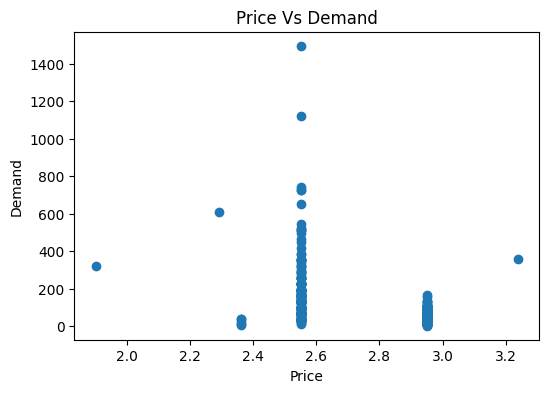

In [15]:
# Price VS Demand relationship
sample_product=daily_demand["StockCode"].value_counts().idxmax()
sample_df=daily_demand[daily_demand["StockCode"]==sample_product]

plt.figure(figsize=(6,4))
plt.scatter(sample_df["Price"],sample_df["Quantity"])
plt.xlabel("Price")
plt.ylabel("Demand")
plt.title("Price Vs Demand")
plt.show()

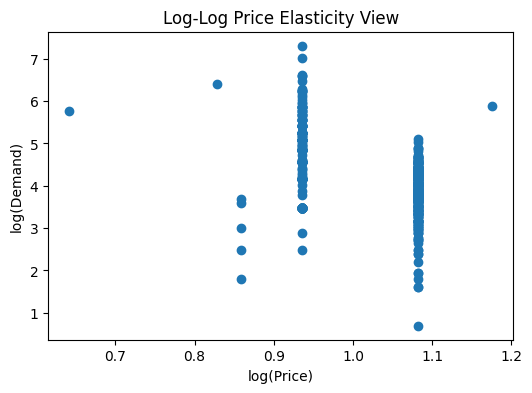

In [16]:
# Log-Log Eleasticity Visualization
sample_df=sample_df.copy()
sample_df["log_price"]=np.log(sample_df["Price"])
sample_df["log_demand"]=np.log(sample_df["Quantity"])

plt.figure(figsize=(6,4))
plt.scatter(sample_df["log_price"], sample_df["log_demand"])
plt.xlabel("log(Price)")
plt.ylabel("log(Demand)")
plt.title("Log-Log Price Elasticity View")
plt.show()


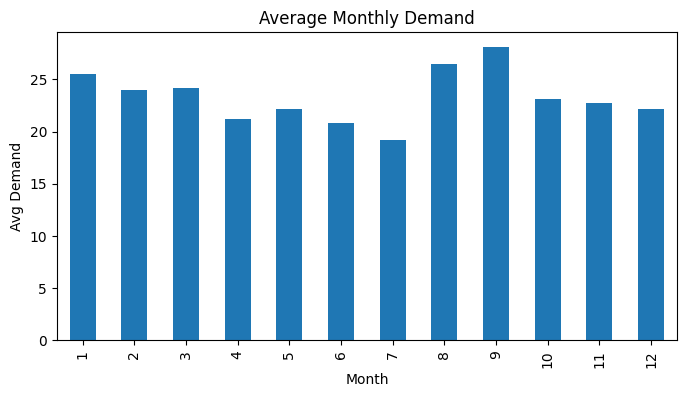

In [17]:
# Seasonality Analysis
daily_demand['date']=pd.to_datetime(daily_demand["date"])
daily_demand['month']=daily_demand["date"].dt.month

monthly_demand=daily_demand.groupby("month")['Quantity'].mean()


plt.figure(figsize=(8,4))
monthly_demand.plot(kind="bar")
plt.title("Average Monthly Demand")
plt.xlabel("Month")
plt.ylabel("Avg Demand")
plt.show()

In [20]:
# Outlier Handling 
daily_demand = pd.read_csv("../data/processed/daily_demand.csv")
q99=daily_demand["Quantity"].quantile(0.99)
daily_demand=daily_demand[daily_demand["Quantity"]<=q99]

print("After outlier removal:", daily_demand.shape)


After outlier removal: (235633, 4)


C:\Users\Lovleen\AppData\Local\Temp\ipykernel_13604\2565034237.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  daily_demand = pd.read_csv("../data/processed/daily_demand.csv")


### EDA Summary
- Demand shows inverse relationship with price
- Log-log plot validates elasticity modeling
- Strong seasonal patterns observed
- Extreme outliers removed to stabilize pricing logic
- Dataset suitable for demand forecasting & optimization
